# (1) Load Data

In [4]:
from sklearn.datasets import load_diabetes

diabetes = load_diabetes()

In [5]:
df_X = diabetes.data
df_y = diabetes.target

In [6]:
df_X.shape, df_y.shape

((442, 10), (442,))

# (2) Prepare X

In [7]:
df_X

array([[ 0.03807591,  0.05068012,  0.06169621, ..., -0.00259226,
         0.01990842, -0.01764613],
       [-0.00188202, -0.04464164, -0.05147406, ..., -0.03949338,
        -0.06832974, -0.09220405],
       [ 0.08529891,  0.05068012,  0.04445121, ..., -0.00259226,
         0.00286377, -0.02593034],
       ...,
       [ 0.04170844,  0.05068012, -0.01590626, ..., -0.01107952,
        -0.04687948,  0.01549073],
       [-0.04547248, -0.04464164,  0.03906215, ...,  0.02655962,
         0.04452837, -0.02593034],
       [-0.04547248, -0.04464164, -0.0730303 , ..., -0.03949338,
        -0.00421986,  0.00306441]])

In [8]:
# 이미 numpy array인데?

# (3) Prepare y

In [9]:
df_y

array([151.,  75., 141., 206., 135.,  97., 138.,  63., 110., 310., 101.,
        69., 179., 185., 118., 171., 166., 144.,  97., 168.,  68.,  49.,
        68., 245., 184., 202., 137.,  85., 131., 283., 129.,  59., 341.,
        87.,  65., 102., 265., 276., 252.,  90., 100.,  55.,  61.,  92.,
       259.,  53., 190., 142.,  75., 142., 155., 225.,  59., 104., 182.,
       128.,  52.,  37., 170., 170.,  61., 144.,  52., 128.,  71., 163.,
       150.,  97., 160., 178.,  48., 270., 202., 111.,  85.,  42., 170.,
       200., 252., 113., 143.,  51.,  52., 210.,  65., 141.,  55., 134.,
        42., 111.,  98., 164.,  48.,  96.,  90., 162., 150., 279.,  92.,
        83., 128., 102., 302., 198.,  95.,  53., 134., 144., 232.,  81.,
       104.,  59., 246., 297., 258., 229., 275., 281., 179., 200., 200.,
       173., 180.,  84., 121., 161.,  99., 109., 115., 268., 274., 158.,
       107.,  83., 103., 272.,  85., 280., 336., 281., 118., 317., 235.,
        60., 174., 259., 178., 128.,  96., 126., 28

In [10]:
# 이미 numpy array인데?

# (4) split train, test

In [11]:
from sklearn.model_selection import train_test_split

In [12]:
tr_X, ts_X, tr_y, ts_y = train_test_split(df_X, df_y, test_size=0.25, random_state=2023)

# (5) Prepare Model

In [13]:
import numpy as np

W = np.random.rand(df_X.shape[1])
b = np.random.rand(1)

W.shape, b.shape

((10,), (1,))

In [14]:
def model(X, W, b):
    predictions = 0
    for i in range(W.shape[0]):
        predictions += X[:, i] * W[i]
    predictions += b
    return predictions

In [15]:
model(df_X, W, b).shape

(442,)

# (6) Define loss func

In [16]:
def MSE(a, b):
    mse = ((a - b) ** 2).mean()  # 두 값의 차이의 제곱의 평균
    return mse

In [17]:
MSE(model(df_X, W, b), df_y)

28833.82415225769

# (7) Define gradient func

In [18]:
def gradient(X, W, b, y):
    # N은 데이터 포인트의 개수
    N = len(y)
    
    # y_pred 준비
    y_pred = model(X, W, b)
    
    # 공식에 맞게 gradient 계산
    dW = 1/N * 2 * X.T.dot(y_pred - y)
        
    # b의 gradient 계산
    db = 2 * (y_pred - y).mean()
    return dW, db

In [19]:
dW, db = gradient(df_X, W, b, df_y)
dW.shape, db.shape

((10,), ())

# (8) Set hyperparameter

In [20]:
LEARNING_RATE = 0.001

# (9) Train model

In [22]:
tr_X.shape

(331, 10)

In [23]:
tr_y.shape

(331,)

In [24]:
def loss(X, W, b, y):
    predictions = model(X, W, b)
    L = MSE(predictions, y)
    return L

In [25]:
N = len(tr_y)
    
# y_pred 준비
y_pred = model(tr_X, W, b)

# 공식에 맞게 gradient 계산
dW = 1/N * 2 * tr_X.T.dot(y_pred - tr_y)

# b의 gradient 계산
db = 2 * (y_pred - tr_y).mean()

In [26]:
y_pred.shape

(331,)

In [31]:
LEARNING_RATE = 0.001

W = np.random.rand(df_X.shape[1])
b = np.random.rand(1)

losses = []

for i in range(1, 100000):
    dW, db = gradient(tr_X, W, b, tr_y)
    W -= LEARNING_RATE * dW
    b -= LEARNING_RATE * db
    L = loss(tr_X, W, b, tr_y)
    losses.append(L)
    if i % 10 == 0:
        print('Iteration %d : Loss %0.4f' % (i, L))

Iteration 10 : Loss 28684.7052
Iteration 20 : Loss 27779.1201
Iteration 30 : Loss 26909.0494
Iteration 40 : Loss 26073.0992
Iteration 50 : Loss 25269.9304
Iteration 60 : Loss 24498.2562
Iteration 70 : Loss 23756.8405
Iteration 80 : Loss 23044.4958
Iteration 90 : Loss 22360.0810
Iteration 100 : Loss 21702.4998
Iteration 110 : Loss 21070.6991
Iteration 120 : Loss 20463.6671
Iteration 130 : Loss 19880.4315
Iteration 140 : Loss 19320.0584
Iteration 150 : Loss 18781.6505
Iteration 160 : Loss 18264.3456
Iteration 170 : Loss 17767.3155
Iteration 180 : Loss 17289.7644
Iteration 190 : Loss 16830.9277
Iteration 200 : Loss 16390.0710
Iteration 210 : Loss 15966.4886
Iteration 220 : Loss 15559.5025
Iteration 230 : Loss 15168.4612
Iteration 240 : Loss 14792.7390
Iteration 250 : Loss 14431.7345
Iteration 260 : Loss 14084.8703
Iteration 270 : Loss 13751.5912
Iteration 280 : Loss 13431.3640
Iteration 290 : Loss 13123.6766
Iteration 300 : Loss 12828.0367
Iteration 310 : Loss 12543.9714
Iteration 320 : L

Iteration 3700 : Loss 5369.9376
Iteration 3710 : Loss 5369.2718
Iteration 3720 : Loss 5368.6062
Iteration 3730 : Loss 5367.9409
Iteration 3740 : Loss 5367.2759
Iteration 3750 : Loss 5366.6110
Iteration 3760 : Loss 5365.9464
Iteration 3770 : Loss 5365.2821
Iteration 3780 : Loss 5364.6179
Iteration 3790 : Loss 5363.9540
Iteration 3800 : Loss 5363.2904
Iteration 3810 : Loss 5362.6269
Iteration 3820 : Loss 5361.9637
Iteration 3830 : Loss 5361.3007
Iteration 3840 : Loss 5360.6380
Iteration 3850 : Loss 5359.9754
Iteration 3860 : Loss 5359.3132
Iteration 3870 : Loss 5358.6511
Iteration 3880 : Loss 5357.9893
Iteration 3890 : Loss 5357.3277
Iteration 3900 : Loss 5356.6663
Iteration 3910 : Loss 5356.0051
Iteration 3920 : Loss 5355.3442
Iteration 3930 : Loss 5354.6835
Iteration 3940 : Loss 5354.0230
Iteration 3950 : Loss 5353.3628
Iteration 3960 : Loss 5352.7027
Iteration 3970 : Loss 5352.0429
Iteration 3980 : Loss 5351.3834
Iteration 3990 : Loss 5350.7240
Iteration 4000 : Loss 5350.0649
Iteratio

Iteration 6980 : Loss 5163.1314
Iteration 6990 : Loss 5162.5347
Iteration 7000 : Loss 5161.9383
Iteration 7010 : Loss 5161.3420
Iteration 7020 : Loss 5160.7459
Iteration 7030 : Loss 5160.1500
Iteration 7040 : Loss 5159.5543
Iteration 7050 : Loss 5158.9588
Iteration 7060 : Loss 5158.3635
Iteration 7070 : Loss 5157.7683
Iteration 7080 : Loss 5157.1734
Iteration 7090 : Loss 5156.5787
Iteration 7100 : Loss 5155.9842
Iteration 7110 : Loss 5155.3899
Iteration 7120 : Loss 5154.7957
Iteration 7130 : Loss 5154.2018
Iteration 7140 : Loss 5153.6081
Iteration 7150 : Loss 5153.0145
Iteration 7160 : Loss 5152.4212
Iteration 7170 : Loss 5151.8280
Iteration 7180 : Loss 5151.2351
Iteration 7190 : Loss 5150.6423
Iteration 7200 : Loss 5150.0498
Iteration 7210 : Loss 5149.4574
Iteration 7220 : Loss 5148.8653
Iteration 7230 : Loss 5148.2733
Iteration 7240 : Loss 5147.6815
Iteration 7250 : Loss 5147.0899
Iteration 7260 : Loss 5146.4985
Iteration 7270 : Loss 5145.9073
Iteration 7280 : Loss 5145.3164
Iteratio

Iteration 9740 : Loss 5005.6914
Iteration 9750 : Loss 5005.1465
Iteration 9760 : Loss 5004.6018
Iteration 9770 : Loss 5004.0573
Iteration 9780 : Loss 5003.5130
Iteration 9790 : Loss 5002.9689
Iteration 9800 : Loss 5002.4249
Iteration 9810 : Loss 5001.8811
Iteration 9820 : Loss 5001.3375
Iteration 9830 : Loss 5000.7941
Iteration 9840 : Loss 5000.2508
Iteration 9850 : Loss 4999.7077
Iteration 9860 : Loss 4999.1648
Iteration 9870 : Loss 4998.6221
Iteration 9880 : Loss 4998.0796
Iteration 9890 : Loss 4997.5372
Iteration 9900 : Loss 4996.9950
Iteration 9910 : Loss 4996.4530
Iteration 9920 : Loss 4995.9112
Iteration 9930 : Loss 4995.3695
Iteration 9940 : Loss 4994.8280
Iteration 9950 : Loss 4994.2867
Iteration 9960 : Loss 4993.7456
Iteration 9970 : Loss 4993.2047
Iteration 9980 : Loss 4992.6639
Iteration 9990 : Loss 4992.1233
Iteration 10000 : Loss 4991.5829
Iteration 10010 : Loss 4991.0427
Iteration 10020 : Loss 4990.5026
Iteration 10030 : Loss 4989.9627
Iteration 10040 : Loss 4989.4230
Ite

Iteration 13350 : Loss 4820.1114
Iteration 13360 : Loss 4819.6270
Iteration 13370 : Loss 4819.1427
Iteration 13380 : Loss 4818.6586
Iteration 13390 : Loss 4818.1746
Iteration 13400 : Loss 4817.6908
Iteration 13410 : Loss 4817.2071
Iteration 13420 : Loss 4816.7237
Iteration 13430 : Loss 4816.2403
Iteration 13440 : Loss 4815.7571
Iteration 13450 : Loss 4815.2741
Iteration 13460 : Loss 4814.7913
Iteration 13470 : Loss 4814.3085
Iteration 13480 : Loss 4813.8260
Iteration 13490 : Loss 4813.3436
Iteration 13500 : Loss 4812.8613
Iteration 13510 : Loss 4812.3793
Iteration 13520 : Loss 4811.8973
Iteration 13530 : Loss 4811.4156
Iteration 13540 : Loss 4810.9339
Iteration 13550 : Loss 4810.4525
Iteration 13560 : Loss 4809.9712
Iteration 13570 : Loss 4809.4900
Iteration 13580 : Loss 4809.0090
Iteration 13590 : Loss 4808.5282
Iteration 13600 : Loss 4808.0475
Iteration 13610 : Loss 4807.5670
Iteration 13620 : Loss 4807.0866
Iteration 13630 : Loss 4806.6064
Iteration 13640 : Loss 4806.1263
Iteration 

Iteration 17110 : Loss 4648.5324
Iteration 17120 : Loss 4648.1031
Iteration 17130 : Loss 4647.6739
Iteration 17140 : Loss 4647.2448
Iteration 17150 : Loss 4646.8159
Iteration 17160 : Loss 4646.3872
Iteration 17170 : Loss 4645.9585
Iteration 17180 : Loss 4645.5300
Iteration 17190 : Loss 4645.1017
Iteration 17200 : Loss 4644.6734
Iteration 17210 : Loss 4644.2453
Iteration 17220 : Loss 4643.8174
Iteration 17230 : Loss 4643.3896
Iteration 17240 : Loss 4642.9619
Iteration 17250 : Loss 4642.5343
Iteration 17260 : Loss 4642.1069
Iteration 17270 : Loss 4641.6797
Iteration 17280 : Loss 4641.2525
Iteration 17290 : Loss 4640.8255
Iteration 17300 : Loss 4640.3987
Iteration 17310 : Loss 4639.9719
Iteration 17320 : Loss 4639.5454
Iteration 17330 : Loss 4639.1189
Iteration 17340 : Loss 4638.6926
Iteration 17350 : Loss 4638.2664
Iteration 17360 : Loss 4637.8403
Iteration 17370 : Loss 4637.4144
Iteration 17380 : Loss 4636.9887
Iteration 17390 : Loss 4636.5630
Iteration 17400 : Loss 4636.1375
Iteration 

Iteration 19960 : Loss 4531.5325
Iteration 19970 : Loss 4531.1403
Iteration 19980 : Loss 4530.7482
Iteration 19990 : Loss 4530.3562
Iteration 20000 : Loss 4529.9644
Iteration 20010 : Loss 4529.5726
Iteration 20020 : Loss 4529.1810
Iteration 20030 : Loss 4528.7895
Iteration 20040 : Loss 4528.3981
Iteration 20050 : Loss 4528.0069
Iteration 20060 : Loss 4527.6158
Iteration 20070 : Loss 4527.2248
Iteration 20080 : Loss 4526.8339
Iteration 20090 : Loss 4526.4431
Iteration 20100 : Loss 4526.0525
Iteration 20110 : Loss 4525.6620
Iteration 20120 : Loss 4525.2716
Iteration 20130 : Loss 4524.8814
Iteration 20140 : Loss 4524.4912
Iteration 20150 : Loss 4524.1012
Iteration 20160 : Loss 4523.7113
Iteration 20170 : Loss 4523.3215
Iteration 20180 : Loss 4522.9319
Iteration 20190 : Loss 4522.5424
Iteration 20200 : Loss 4522.1530
Iteration 20210 : Loss 4521.7637
Iteration 20220 : Loss 4521.3745
Iteration 20230 : Loss 4520.9855
Iteration 20240 : Loss 4520.5966
Iteration 20250 : Loss 4520.2078
Iteration 

Iteration 23210 : Loss 4410.3197
Iteration 23220 : Loss 4409.9654
Iteration 23230 : Loss 4409.6112
Iteration 23240 : Loss 4409.2571
Iteration 23250 : Loss 4408.9032
Iteration 23260 : Loss 4408.5493
Iteration 23270 : Loss 4408.1955
Iteration 23280 : Loss 4407.8419
Iteration 23290 : Loss 4407.4883
Iteration 23300 : Loss 4407.1349
Iteration 23310 : Loss 4406.7816
Iteration 23320 : Loss 4406.4284
Iteration 23330 : Loss 4406.0753
Iteration 23340 : Loss 4405.7223
Iteration 23350 : Loss 4405.3694
Iteration 23360 : Loss 4405.0166
Iteration 23370 : Loss 4404.6640
Iteration 23380 : Loss 4404.3114
Iteration 23390 : Loss 4403.9590
Iteration 23400 : Loss 4403.6067
Iteration 23410 : Loss 4403.2544
Iteration 23420 : Loss 4402.9023
Iteration 23430 : Loss 4402.5503
Iteration 23440 : Loss 4402.1984
Iteration 23450 : Loss 4401.8466
Iteration 23460 : Loss 4401.4949
Iteration 23470 : Loss 4401.1434
Iteration 23480 : Loss 4400.7919
Iteration 23490 : Loss 4400.4406
Iteration 23500 : Loss 4400.0893
Iteration 

Iteration 26570 : Loss 4297.2271
Iteration 26580 : Loss 4296.9077
Iteration 26590 : Loss 4296.5883
Iteration 26600 : Loss 4296.2691
Iteration 26610 : Loss 4295.9499
Iteration 26620 : Loss 4295.6309
Iteration 26630 : Loss 4295.3119
Iteration 26640 : Loss 4294.9930
Iteration 26650 : Loss 4294.6743
Iteration 26660 : Loss 4294.3556
Iteration 26670 : Loss 4294.0370
Iteration 26680 : Loss 4293.7185
Iteration 26690 : Loss 4293.4002
Iteration 26700 : Loss 4293.0819
Iteration 26710 : Loss 4292.7637
Iteration 26720 : Loss 4292.4456
Iteration 26730 : Loss 4292.1276
Iteration 26740 : Loss 4291.8097
Iteration 26750 : Loss 4291.4919
Iteration 26760 : Loss 4291.1742
Iteration 26770 : Loss 4290.8566
Iteration 26780 : Loss 4290.5391
Iteration 26790 : Loss 4290.2217
Iteration 26800 : Loss 4289.9044
Iteration 26810 : Loss 4289.5872
Iteration 26820 : Loss 4289.2701
Iteration 26830 : Loss 4288.9530
Iteration 26840 : Loss 4288.6361
Iteration 26850 : Loss 4288.3193
Iteration 26860 : Loss 4288.0026
Iteration 

Iteration 30030 : Loss 4192.2961
Iteration 30040 : Loss 4192.0085
Iteration 30050 : Loss 4191.7209
Iteration 30060 : Loss 4191.4335
Iteration 30070 : Loss 4191.1461
Iteration 30080 : Loss 4190.8588
Iteration 30090 : Loss 4190.5716
Iteration 30100 : Loss 4190.2845
Iteration 30110 : Loss 4189.9974
Iteration 30120 : Loss 4189.7105
Iteration 30130 : Loss 4189.4236
Iteration 30140 : Loss 4189.1368
Iteration 30150 : Loss 4188.8501
Iteration 30160 : Loss 4188.5635
Iteration 30170 : Loss 4188.2770
Iteration 30180 : Loss 4187.9906
Iteration 30190 : Loss 4187.7042
Iteration 30200 : Loss 4187.4180
Iteration 30210 : Loss 4187.1318
Iteration 30220 : Loss 4186.8457
Iteration 30230 : Loss 4186.5597
Iteration 30240 : Loss 4186.2738
Iteration 30250 : Loss 4185.9879
Iteration 30260 : Loss 4185.7022
Iteration 30270 : Loss 4185.4165
Iteration 30280 : Loss 4185.1309
Iteration 30290 : Loss 4184.8455
Iteration 30300 : Loss 4184.5600
Iteration 30310 : Loss 4184.2747
Iteration 30320 : Loss 4183.9895
Iteration 

Iteration 33470 : Loss 4098.2471
Iteration 33480 : Loss 4097.9875
Iteration 33490 : Loss 4097.7279
Iteration 33500 : Loss 4097.4684
Iteration 33510 : Loss 4097.2090
Iteration 33520 : Loss 4096.9497
Iteration 33530 : Loss 4096.6904
Iteration 33540 : Loss 4096.4313
Iteration 33550 : Loss 4096.1722
Iteration 33560 : Loss 4095.9131
Iteration 33570 : Loss 4095.6542
Iteration 33580 : Loss 4095.3953
Iteration 33590 : Loss 4095.1365
Iteration 33600 : Loss 4094.8778
Iteration 33610 : Loss 4094.6192
Iteration 33620 : Loss 4094.3606
Iteration 33630 : Loss 4094.1021
Iteration 33640 : Loss 4093.8437
Iteration 33650 : Loss 4093.5853
Iteration 33660 : Loss 4093.3271
Iteration 33670 : Loss 4093.0689
Iteration 33680 : Loss 4092.8108
Iteration 33690 : Loss 4092.5527
Iteration 33700 : Loss 4092.2948
Iteration 33710 : Loss 4092.0369
Iteration 33720 : Loss 4091.7791
Iteration 33730 : Loss 4091.5214
Iteration 33740 : Loss 4091.2637
Iteration 33750 : Loss 4091.0061
Iteration 33760 : Loss 4090.7486
Iteration 

Iteration 36050 : Loss 4033.7255
Iteration 36060 : Loss 4033.4847
Iteration 36070 : Loss 4033.2441
Iteration 36080 : Loss 4033.0035
Iteration 36090 : Loss 4032.7629
Iteration 36100 : Loss 4032.5225
Iteration 36110 : Loss 4032.2821
Iteration 36120 : Loss 4032.0418
Iteration 36130 : Loss 4031.8015
Iteration 36140 : Loss 4031.5613
Iteration 36150 : Loss 4031.3212
Iteration 36160 : Loss 4031.0812
Iteration 36170 : Loss 4030.8412
Iteration 36180 : Loss 4030.6013
Iteration 36190 : Loss 4030.3615
Iteration 36200 : Loss 4030.1217
Iteration 36210 : Loss 4029.8820
Iteration 36220 : Loss 4029.6424
Iteration 36230 : Loss 4029.4028
Iteration 36240 : Loss 4029.1633
Iteration 36250 : Loss 4028.9239
Iteration 36260 : Loss 4028.6846
Iteration 36270 : Loss 4028.4453
Iteration 36280 : Loss 4028.2061
Iteration 36290 : Loss 4027.9669
Iteration 36300 : Loss 4027.7279
Iteration 36310 : Loss 4027.4889
Iteration 36320 : Loss 4027.2499
Iteration 36330 : Loss 4027.0111
Iteration 36340 : Loss 4026.7723
Iteration 

Iteration 39280 : Loss 3959.4733
Iteration 39290 : Loss 3959.2540
Iteration 39300 : Loss 3959.0347
Iteration 39310 : Loss 3958.8155
Iteration 39320 : Loss 3958.5963
Iteration 39330 : Loss 3958.3772
Iteration 39340 : Loss 3958.1581
Iteration 39350 : Loss 3957.9392
Iteration 39360 : Loss 3957.7202
Iteration 39370 : Loss 3957.5014
Iteration 39380 : Loss 3957.2826
Iteration 39390 : Loss 3957.0638
Iteration 39400 : Loss 3956.8452
Iteration 39410 : Loss 3956.6266
Iteration 39420 : Loss 3956.4080
Iteration 39430 : Loss 3956.1895
Iteration 39440 : Loss 3955.9711
Iteration 39450 : Loss 3955.7528
Iteration 39460 : Loss 3955.5345
Iteration 39470 : Loss 3955.3162
Iteration 39480 : Loss 3955.0980
Iteration 39490 : Loss 3954.8799
Iteration 39500 : Loss 3954.6619
Iteration 39510 : Loss 3954.4439
Iteration 39520 : Loss 3954.2260
Iteration 39530 : Loss 3954.0081
Iteration 39540 : Loss 3953.7903
Iteration 39550 : Loss 3953.5726
Iteration 39560 : Loss 3953.3549
Iteration 39570 : Loss 3953.1373
Iteration 

Iteration 42630 : Loss 3889.3574
Iteration 42640 : Loss 3889.1578
Iteration 42650 : Loss 3888.9583
Iteration 42660 : Loss 3888.7588
Iteration 42670 : Loss 3888.5594
Iteration 42680 : Loss 3888.3601
Iteration 42690 : Loss 3888.1608
Iteration 42700 : Loss 3887.9616
Iteration 42710 : Loss 3887.7624
Iteration 42720 : Loss 3887.5633
Iteration 42730 : Loss 3887.3642
Iteration 42740 : Loss 3887.1652
Iteration 42750 : Loss 3886.9662
Iteration 42760 : Loss 3886.7673
Iteration 42770 : Loss 3886.5685
Iteration 42780 : Loss 3886.3697
Iteration 42790 : Loss 3886.1710
Iteration 42800 : Loss 3885.9723
Iteration 42810 : Loss 3885.7737
Iteration 42820 : Loss 3885.5751
Iteration 42830 : Loss 3885.3766
Iteration 42840 : Loss 3885.1781
Iteration 42850 : Loss 3884.9797
Iteration 42860 : Loss 3884.7814
Iteration 42870 : Loss 3884.5831
Iteration 42880 : Loss 3884.3848
Iteration 42890 : Loss 3884.1867
Iteration 42900 : Loss 3883.9885
Iteration 42910 : Loss 3883.7905
Iteration 42920 : Loss 3883.5925
Iteration 

Iteration 45790 : Loss 3828.9705
Iteration 45800 : Loss 3828.7876
Iteration 45810 : Loss 3828.6048
Iteration 45820 : Loss 3828.4220
Iteration 45830 : Loss 3828.2393
Iteration 45840 : Loss 3828.0566
Iteration 45850 : Loss 3827.8740
Iteration 45860 : Loss 3827.6914
Iteration 45870 : Loss 3827.5089
Iteration 45880 : Loss 3827.3264
Iteration 45890 : Loss 3827.1440
Iteration 45900 : Loss 3826.9616
Iteration 45910 : Loss 3826.7793
Iteration 45920 : Loss 3826.5970
Iteration 45930 : Loss 3826.4148
Iteration 45940 : Loss 3826.2326
Iteration 45950 : Loss 3826.0505
Iteration 45960 : Loss 3825.8684
Iteration 45970 : Loss 3825.6864
Iteration 45980 : Loss 3825.5044
Iteration 45990 : Loss 3825.3225
Iteration 46000 : Loss 3825.1406
Iteration 46010 : Loss 3824.9587
Iteration 46020 : Loss 3824.7770
Iteration 46030 : Loss 3824.5952
Iteration 46040 : Loss 3824.4136
Iteration 46050 : Loss 3824.2319
Iteration 46060 : Loss 3824.0503
Iteration 46070 : Loss 3823.8688
Iteration 46080 : Loss 3823.6873
Iteration 

Iteration 48450 : Loss 3782.0363
Iteration 48460 : Loss 3781.8661
Iteration 48470 : Loss 3781.6960
Iteration 48480 : Loss 3781.5259
Iteration 48490 : Loss 3781.3559
Iteration 48500 : Loss 3781.1859
Iteration 48510 : Loss 3781.0160
Iteration 48520 : Loss 3780.8461
Iteration 48530 : Loss 3780.6763
Iteration 48540 : Loss 3780.5065
Iteration 48550 : Loss 3780.3368
Iteration 48560 : Loss 3780.1671
Iteration 48570 : Loss 3779.9974
Iteration 48580 : Loss 3779.8278
Iteration 48590 : Loss 3779.6582
Iteration 48600 : Loss 3779.4887
Iteration 48610 : Loss 3779.3192
Iteration 48620 : Loss 3779.1498
Iteration 48630 : Loss 3778.9804
Iteration 48640 : Loss 3778.8111
Iteration 48650 : Loss 3778.6418
Iteration 48660 : Loss 3778.4726
Iteration 48670 : Loss 3778.3034
Iteration 48680 : Loss 3778.1342
Iteration 48690 : Loss 3777.9651
Iteration 48700 : Loss 3777.7960
Iteration 48710 : Loss 3777.6270
Iteration 48720 : Loss 3777.4580
Iteration 48730 : Loss 3777.2891
Iteration 48740 : Loss 3777.1202
Iteration 

Iteration 51780 : Loss 3727.8078
Iteration 51790 : Loss 3727.6520
Iteration 51800 : Loss 3727.4963
Iteration 51810 : Loss 3727.3406
Iteration 51820 : Loss 3727.1850
Iteration 51830 : Loss 3727.0294
Iteration 51840 : Loss 3726.8738
Iteration 51850 : Loss 3726.7183
Iteration 51860 : Loss 3726.5628
Iteration 51870 : Loss 3726.4074
Iteration 51880 : Loss 3726.2520
Iteration 51890 : Loss 3726.0966
Iteration 51900 : Loss 3725.9413
Iteration 51910 : Loss 3725.7860
Iteration 51920 : Loss 3725.6308
Iteration 51930 : Loss 3725.4756
Iteration 51940 : Loss 3725.3204
Iteration 51950 : Loss 3725.1653
Iteration 51960 : Loss 3725.0103
Iteration 51970 : Loss 3724.8552
Iteration 51980 : Loss 3724.7002
Iteration 51990 : Loss 3724.5453
Iteration 52000 : Loss 3724.3904
Iteration 52010 : Loss 3724.2355
Iteration 52020 : Loss 3724.0807
Iteration 52030 : Loss 3723.9259
Iteration 52040 : Loss 3723.7711
Iteration 52050 : Loss 3723.6164
Iteration 52060 : Loss 3723.4617
Iteration 52070 : Loss 3723.3071
Iteration 

Iteration 55390 : Loss 3674.1262
Iteration 55400 : Loss 3673.9843
Iteration 55410 : Loss 3673.8424
Iteration 55420 : Loss 3673.7006
Iteration 55430 : Loss 3673.5589
Iteration 55440 : Loss 3673.4171
Iteration 55450 : Loss 3673.2754
Iteration 55460 : Loss 3673.1338
Iteration 55470 : Loss 3672.9921
Iteration 55480 : Loss 3672.8505
Iteration 55490 : Loss 3672.7090
Iteration 55500 : Loss 3672.5675
Iteration 55510 : Loss 3672.4260
Iteration 55520 : Loss 3672.2845
Iteration 55530 : Loss 3672.1431
Iteration 55540 : Loss 3672.0018
Iteration 55550 : Loss 3671.8604
Iteration 55560 : Loss 3671.7191
Iteration 55570 : Loss 3671.5779
Iteration 55580 : Loss 3671.4366
Iteration 55590 : Loss 3671.2954
Iteration 55600 : Loss 3671.1543
Iteration 55610 : Loss 3671.0131
Iteration 55620 : Loss 3670.8721
Iteration 55630 : Loss 3670.7310
Iteration 55640 : Loss 3670.5900
Iteration 55650 : Loss 3670.4490
Iteration 55660 : Loss 3670.3081
Iteration 55670 : Loss 3670.1672
Iteration 55680 : Loss 3670.0263
Iteration 

Iteration 58700 : Loss 3629.0707
Iteration 58710 : Loss 3628.9401
Iteration 58720 : Loss 3628.8096
Iteration 58730 : Loss 3628.6792
Iteration 58740 : Loss 3628.5487
Iteration 58750 : Loss 3628.4183
Iteration 58760 : Loss 3628.2880
Iteration 58770 : Loss 3628.1576
Iteration 58780 : Loss 3628.0273
Iteration 58790 : Loss 3627.8971
Iteration 58800 : Loss 3627.7668
Iteration 58810 : Loss 3627.6366
Iteration 58820 : Loss 3627.5064
Iteration 58830 : Loss 3627.3763
Iteration 58840 : Loss 3627.2462
Iteration 58850 : Loss 3627.1161
Iteration 58860 : Loss 3626.9861
Iteration 58870 : Loss 3626.8560
Iteration 58880 : Loss 3626.7261
Iteration 58890 : Loss 3626.5961
Iteration 58900 : Loss 3626.4662
Iteration 58910 : Loss 3626.3363
Iteration 58920 : Loss 3626.2065
Iteration 58930 : Loss 3626.0766
Iteration 58940 : Loss 3625.9469
Iteration 58950 : Loss 3625.8171
Iteration 58960 : Loss 3625.6874
Iteration 58970 : Loss 3625.5577
Iteration 58980 : Loss 3625.4280
Iteration 58990 : Loss 3625.2984
Iteration 

Iteration 61320 : Loss 3595.9498
Iteration 61330 : Loss 3595.8274
Iteration 61340 : Loss 3595.7051
Iteration 61350 : Loss 3595.5827
Iteration 61360 : Loss 3595.4604
Iteration 61370 : Loss 3595.3382
Iteration 61380 : Loss 3595.2159
Iteration 61390 : Loss 3595.0937
Iteration 61400 : Loss 3594.9715
Iteration 61410 : Loss 3594.8494
Iteration 61420 : Loss 3594.7273
Iteration 61430 : Loss 3594.6052
Iteration 61440 : Loss 3594.4831
Iteration 61450 : Loss 3594.3611
Iteration 61460 : Loss 3594.2391
Iteration 61470 : Loss 3594.1171
Iteration 61480 : Loss 3593.9952
Iteration 61490 : Loss 3593.8733
Iteration 61500 : Loss 3593.7514
Iteration 61510 : Loss 3593.6296
Iteration 61520 : Loss 3593.5077
Iteration 61530 : Loss 3593.3859
Iteration 61540 : Loss 3593.2642
Iteration 61550 : Loss 3593.1425
Iteration 61560 : Loss 3593.0207
Iteration 61570 : Loss 3592.8991
Iteration 61580 : Loss 3592.7774
Iteration 61590 : Loss 3592.6558
Iteration 61600 : Loss 3592.5342
Iteration 61610 : Loss 3592.4127
Iteration 

Iteration 64780 : Loss 3555.3174
Iteration 64790 : Loss 3555.2047
Iteration 64800 : Loss 3555.0921
Iteration 64810 : Loss 3554.9795
Iteration 64820 : Loss 3554.8670
Iteration 64830 : Loss 3554.7545
Iteration 64840 : Loss 3554.6419
Iteration 64850 : Loss 3554.5295
Iteration 64860 : Loss 3554.4170
Iteration 64870 : Loss 3554.3046
Iteration 64880 : Loss 3554.1922
Iteration 64890 : Loss 3554.0798
Iteration 64900 : Loss 3553.9675
Iteration 64910 : Loss 3553.8552
Iteration 64920 : Loss 3553.7429
Iteration 64930 : Loss 3553.6306
Iteration 64940 : Loss 3553.5184
Iteration 64950 : Loss 3553.4061
Iteration 64960 : Loss 3553.2940
Iteration 64970 : Loss 3553.1818
Iteration 64980 : Loss 3553.0697
Iteration 64990 : Loss 3552.9576
Iteration 65000 : Loss 3552.8455
Iteration 65010 : Loss 3552.7334
Iteration 65020 : Loss 3552.6214
Iteration 65030 : Loss 3552.5094
Iteration 65040 : Loss 3552.3974
Iteration 65050 : Loss 3552.2855
Iteration 65060 : Loss 3552.1735
Iteration 65070 : Loss 3552.0616
Iteration 

Iteration 67420 : Loss 3526.4797
Iteration 67430 : Loss 3526.3738
Iteration 67440 : Loss 3526.2679
Iteration 67450 : Loss 3526.1621
Iteration 67460 : Loss 3526.0563
Iteration 67470 : Loss 3525.9505
Iteration 67480 : Loss 3525.8447
Iteration 67490 : Loss 3525.7389
Iteration 67500 : Loss 3525.6332
Iteration 67510 : Loss 3525.5275
Iteration 67520 : Loss 3525.4218
Iteration 67530 : Loss 3525.3162
Iteration 67540 : Loss 3525.2105
Iteration 67550 : Loss 3525.1049
Iteration 67560 : Loss 3524.9993
Iteration 67570 : Loss 3524.8938
Iteration 67580 : Loss 3524.7883
Iteration 67590 : Loss 3524.6828
Iteration 67600 : Loss 3524.5773
Iteration 67610 : Loss 3524.4718
Iteration 67620 : Loss 3524.3664
Iteration 67630 : Loss 3524.2610
Iteration 67640 : Loss 3524.1556
Iteration 67650 : Loss 3524.0502
Iteration 67660 : Loss 3523.9449
Iteration 67670 : Loss 3523.8396
Iteration 67680 : Loss 3523.7343
Iteration 67690 : Loss 3523.6290
Iteration 67700 : Loss 3523.5238
Iteration 67710 : Loss 3523.4186
Iteration 

Iteration 70300 : Loss 3496.9621
Iteration 70310 : Loss 3496.8629
Iteration 70320 : Loss 3496.7638
Iteration 70330 : Loss 3496.6647
Iteration 70340 : Loss 3496.5656
Iteration 70350 : Loss 3496.4665
Iteration 70360 : Loss 3496.3674
Iteration 70370 : Loss 3496.2684
Iteration 70380 : Loss 3496.1694
Iteration 70390 : Loss 3496.0704
Iteration 70400 : Loss 3495.9714
Iteration 70410 : Loss 3495.8725
Iteration 70420 : Loss 3495.7736
Iteration 70430 : Loss 3495.6747
Iteration 70440 : Loss 3495.5758
Iteration 70450 : Loss 3495.4770
Iteration 70460 : Loss 3495.3781
Iteration 70470 : Loss 3495.2793
Iteration 70480 : Loss 3495.1805
Iteration 70490 : Loss 3495.0818
Iteration 70500 : Loss 3494.9830
Iteration 70510 : Loss 3494.8843
Iteration 70520 : Loss 3494.7856
Iteration 70530 : Loss 3494.6869
Iteration 70540 : Loss 3494.5883
Iteration 70550 : Loss 3494.4897
Iteration 70560 : Loss 3494.3911
Iteration 70570 : Loss 3494.2925
Iteration 70580 : Loss 3494.1939
Iteration 70590 : Loss 3494.0954
Iteration 

Iteration 73150 : Loss 3469.5780
Iteration 73160 : Loss 3469.4849
Iteration 73170 : Loss 3469.3918
Iteration 73180 : Loss 3469.2988
Iteration 73190 : Loss 3469.2058
Iteration 73200 : Loss 3469.1128
Iteration 73210 : Loss 3469.0198
Iteration 73220 : Loss 3468.9269
Iteration 73230 : Loss 3468.8339
Iteration 73240 : Loss 3468.7410
Iteration 73250 : Loss 3468.6481
Iteration 73260 : Loss 3468.5553
Iteration 73270 : Loss 3468.4624
Iteration 73280 : Loss 3468.3696
Iteration 73290 : Loss 3468.2768
Iteration 73300 : Loss 3468.1840
Iteration 73310 : Loss 3468.0912
Iteration 73320 : Loss 3467.9985
Iteration 73330 : Loss 3467.9057
Iteration 73340 : Loss 3467.8130
Iteration 73350 : Loss 3467.7204
Iteration 73360 : Loss 3467.6277
Iteration 73370 : Loss 3467.5350
Iteration 73380 : Loss 3467.4424
Iteration 73390 : Loss 3467.3498
Iteration 73400 : Loss 3467.2572
Iteration 73410 : Loss 3467.1647
Iteration 73420 : Loss 3467.0721
Iteration 73430 : Loss 3466.9796
Iteration 73440 : Loss 3466.8871
Iteration 

Iteration 76500 : Loss 3439.5026
Iteration 76510 : Loss 3439.4161
Iteration 76520 : Loss 3439.3295
Iteration 76530 : Loss 3439.2430
Iteration 76540 : Loss 3439.1565
Iteration 76550 : Loss 3439.0700
Iteration 76560 : Loss 3438.9835
Iteration 76570 : Loss 3438.8970
Iteration 76580 : Loss 3438.8106
Iteration 76590 : Loss 3438.7242
Iteration 76600 : Loss 3438.6377
Iteration 76610 : Loss 3438.5514
Iteration 76620 : Loss 3438.4650
Iteration 76630 : Loss 3438.3786
Iteration 76640 : Loss 3438.2923
Iteration 76650 : Loss 3438.2060
Iteration 76660 : Loss 3438.1197
Iteration 76670 : Loss 3438.0334
Iteration 76680 : Loss 3437.9472
Iteration 76690 : Loss 3437.8609
Iteration 76700 : Loss 3437.7747
Iteration 76710 : Loss 3437.6885
Iteration 76720 : Loss 3437.6023
Iteration 76730 : Loss 3437.5161
Iteration 76740 : Loss 3437.4300
Iteration 76750 : Loss 3437.3438
Iteration 76760 : Loss 3437.2577
Iteration 76770 : Loss 3437.1716
Iteration 76780 : Loss 3437.0856
Iteration 76790 : Loss 3436.9995
Iteration 

Iteration 79010 : Loss 3418.3366
Iteration 79020 : Loss 3418.2545
Iteration 79030 : Loss 3418.1724
Iteration 79040 : Loss 3418.0903
Iteration 79050 : Loss 3418.0083
Iteration 79060 : Loss 3417.9262
Iteration 79070 : Loss 3417.8442
Iteration 79080 : Loss 3417.7621
Iteration 79090 : Loss 3417.6801
Iteration 79100 : Loss 3417.5982
Iteration 79110 : Loss 3417.5162
Iteration 79120 : Loss 3417.4342
Iteration 79130 : Loss 3417.3523
Iteration 79140 : Loss 3417.2704
Iteration 79150 : Loss 3417.1885
Iteration 79160 : Loss 3417.1066
Iteration 79170 : Loss 3417.0248
Iteration 79180 : Loss 3416.9429
Iteration 79190 : Loss 3416.8611
Iteration 79200 : Loss 3416.7793
Iteration 79210 : Loss 3416.6975
Iteration 79220 : Loss 3416.6157
Iteration 79230 : Loss 3416.5339
Iteration 79240 : Loss 3416.4522
Iteration 79250 : Loss 3416.3704
Iteration 79260 : Loss 3416.2887
Iteration 79270 : Loss 3416.2070
Iteration 79280 : Loss 3416.1254
Iteration 79290 : Loss 3416.0437
Iteration 79300 : Loss 3415.9621
Iteration 

Iteration 82690 : Loss 3389.2279
Iteration 82700 : Loss 3389.1518
Iteration 82710 : Loss 3389.0756
Iteration 82720 : Loss 3388.9995
Iteration 82730 : Loss 3388.9234
Iteration 82740 : Loss 3388.8472
Iteration 82750 : Loss 3388.7711
Iteration 82760 : Loss 3388.6951
Iteration 82770 : Loss 3388.6190
Iteration 82780 : Loss 3388.5429
Iteration 82790 : Loss 3388.4669
Iteration 82800 : Loss 3388.3909
Iteration 82810 : Loss 3388.3149
Iteration 82820 : Loss 3388.2389
Iteration 82830 : Loss 3388.1629
Iteration 82840 : Loss 3388.0870
Iteration 82850 : Loss 3388.0110
Iteration 82860 : Loss 3387.9351
Iteration 82870 : Loss 3387.8592
Iteration 82880 : Loss 3387.7833
Iteration 82890 : Loss 3387.7074
Iteration 82900 : Loss 3387.6315
Iteration 82910 : Loss 3387.5557
Iteration 82920 : Loss 3387.4798
Iteration 82930 : Loss 3387.4040
Iteration 82940 : Loss 3387.3282
Iteration 82950 : Loss 3387.2524
Iteration 82960 : Loss 3387.1766
Iteration 82970 : Loss 3387.1009
Iteration 82980 : Loss 3387.0251
Iteration 

Iteration 86260 : Loss 3362.9729
Iteration 86270 : Loss 3362.9019
Iteration 86280 : Loss 3362.8309
Iteration 86290 : Loss 3362.7599
Iteration 86300 : Loss 3362.6890
Iteration 86310 : Loss 3362.6180
Iteration 86320 : Loss 3362.5471
Iteration 86330 : Loss 3362.4762
Iteration 86340 : Loss 3362.4053
Iteration 86350 : Loss 3362.3344
Iteration 86360 : Loss 3362.2636
Iteration 86370 : Loss 3362.1927
Iteration 86380 : Loss 3362.1219
Iteration 86390 : Loss 3362.0511
Iteration 86400 : Loss 3361.9802
Iteration 86410 : Loss 3361.9094
Iteration 86420 : Loss 3361.8387
Iteration 86430 : Loss 3361.7679
Iteration 86440 : Loss 3361.6971
Iteration 86450 : Loss 3361.6264
Iteration 86460 : Loss 3361.5557
Iteration 86470 : Loss 3361.4849
Iteration 86480 : Loss 3361.4142
Iteration 86490 : Loss 3361.3436
Iteration 86500 : Loss 3361.2729
Iteration 86510 : Loss 3361.2022
Iteration 86520 : Loss 3361.1316
Iteration 86530 : Loss 3361.0609
Iteration 86540 : Loss 3360.9903
Iteration 86550 : Loss 3360.9197
Iteration 

Iteration 88850 : Loss 3345.0350
Iteration 88860 : Loss 3344.9674
Iteration 88870 : Loss 3344.8999
Iteration 88880 : Loss 3344.8324
Iteration 88890 : Loss 3344.7648
Iteration 88900 : Loss 3344.6973
Iteration 88910 : Loss 3344.6298
Iteration 88920 : Loss 3344.5624
Iteration 88930 : Loss 3344.4949
Iteration 88940 : Loss 3344.4274
Iteration 88950 : Loss 3344.3600
Iteration 88960 : Loss 3344.2926
Iteration 88970 : Loss 3344.2252
Iteration 88980 : Loss 3344.1578
Iteration 88990 : Loss 3344.0904
Iteration 89000 : Loss 3344.0230
Iteration 89010 : Loss 3343.9556
Iteration 89020 : Loss 3343.8883
Iteration 89030 : Loss 3343.8209
Iteration 89040 : Loss 3343.7536
Iteration 89050 : Loss 3343.6863
Iteration 89060 : Loss 3343.6190
Iteration 89070 : Loss 3343.5517
Iteration 89080 : Loss 3343.4844
Iteration 89090 : Loss 3343.4172
Iteration 89100 : Loss 3343.3499
Iteration 89110 : Loss 3343.2827
Iteration 89120 : Loss 3343.2155
Iteration 89130 : Loss 3343.1483
Iteration 89140 : Loss 3343.0811
Iteration 

Iteration 92260 : Loss 3322.7160
Iteration 92270 : Loss 3322.6526
Iteration 92280 : Loss 3322.5892
Iteration 92290 : Loss 3322.5258
Iteration 92300 : Loss 3322.4625
Iteration 92310 : Loss 3322.3991
Iteration 92320 : Loss 3322.3358
Iteration 92330 : Loss 3322.2724
Iteration 92340 : Loss 3322.2091
Iteration 92350 : Loss 3322.1458
Iteration 92360 : Loss 3322.0825
Iteration 92370 : Loss 3322.0192
Iteration 92380 : Loss 3321.9560
Iteration 92390 : Loss 3321.8927
Iteration 92400 : Loss 3321.8294
Iteration 92410 : Loss 3321.7662
Iteration 92420 : Loss 3321.7030
Iteration 92430 : Loss 3321.6398
Iteration 92440 : Loss 3321.5765
Iteration 92450 : Loss 3321.5134
Iteration 92460 : Loss 3321.4502
Iteration 92470 : Loss 3321.3870
Iteration 92480 : Loss 3321.3238
Iteration 92490 : Loss 3321.2607
Iteration 92500 : Loss 3321.1976
Iteration 92510 : Loss 3321.1344
Iteration 92520 : Loss 3321.0713
Iteration 92530 : Loss 3321.0082
Iteration 92540 : Loss 3320.9451
Iteration 92550 : Loss 3320.8820
Iteration 

Iteration 95690 : Loss 3301.6282
Iteration 95700 : Loss 3301.5686
Iteration 95710 : Loss 3301.5090
Iteration 95720 : Loss 3301.4494
Iteration 95730 : Loss 3301.3898
Iteration 95740 : Loss 3301.3302
Iteration 95750 : Loss 3301.2707
Iteration 95760 : Loss 3301.2111
Iteration 95770 : Loss 3301.1516
Iteration 95780 : Loss 3301.0921
Iteration 95790 : Loss 3301.0326
Iteration 95800 : Loss 3300.9731
Iteration 95810 : Loss 3300.9136
Iteration 95820 : Loss 3300.8541
Iteration 95830 : Loss 3300.7946
Iteration 95840 : Loss 3300.7351
Iteration 95850 : Loss 3300.6757
Iteration 95860 : Loss 3300.6163
Iteration 95870 : Loss 3300.5568
Iteration 95880 : Loss 3300.4974
Iteration 95890 : Loss 3300.4380
Iteration 95900 : Loss 3300.3786
Iteration 95910 : Loss 3300.3192
Iteration 95920 : Loss 3300.2598
Iteration 95930 : Loss 3300.2005
Iteration 95940 : Loss 3300.1411
Iteration 95950 : Loss 3300.0818
Iteration 95960 : Loss 3300.0224
Iteration 95970 : Loss 3299.9631
Iteration 95980 : Loss 3299.9038
Iteration 

Iteration 99320 : Loss 3280.6613
Iteration 99330 : Loss 3280.6053
Iteration 99340 : Loss 3280.5493
Iteration 99350 : Loss 3280.4934
Iteration 99360 : Loss 3280.4375
Iteration 99370 : Loss 3280.3815
Iteration 99380 : Loss 3280.3256
Iteration 99390 : Loss 3280.2697
Iteration 99400 : Loss 3280.2138
Iteration 99410 : Loss 3280.1579
Iteration 99420 : Loss 3280.1021
Iteration 99430 : Loss 3280.0462
Iteration 99440 : Loss 3279.9903
Iteration 99450 : Loss 3279.9345
Iteration 99460 : Loss 3279.8787
Iteration 99470 : Loss 3279.8228
Iteration 99480 : Loss 3279.7670
Iteration 99490 : Loss 3279.7112
Iteration 99500 : Loss 3279.6554
Iteration 99510 : Loss 3279.5996
Iteration 99520 : Loss 3279.5438
Iteration 99530 : Loss 3279.4881
Iteration 99540 : Loss 3279.4323
Iteration 99550 : Loss 3279.3765
Iteration 99560 : Loss 3279.3208
Iteration 99570 : Loss 3279.2651
Iteration 99580 : Loss 3279.2093
Iteration 99590 : Loss 3279.1536
Iteration 99600 : Loss 3279.0979
Iteration 99610 : Loss 3279.0422
Iteration 

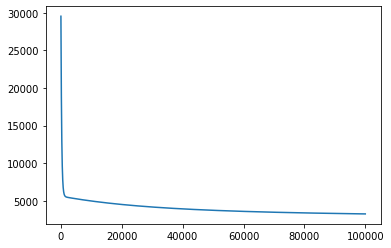

In [32]:
import matplotlib.pyplot as plt
plt.plot(losses)
plt.show()

# (10) test 데이터에 대한 성능 확인하기

In [33]:
predictions = model(ts_X, W, b)
L = MSE(predictions, ts_y)
L

3991.728513446305

# (11) 정답 데이터와 예측한 데이터 시각화하기

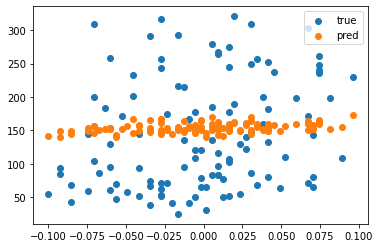

In [30]:
plt.scatter(ts_X[:, 0], ts_y, label='true')
plt.scatter(ts_X[:, 0], predictions, label='pred')
plt.legend()
plt.show()